In [4]:
# Setup and Imports
print("=" * 70)
print("HOTEL BOOKING PERFORMANCE ANALYSIS")
print("=" * 70)

# Importting the  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting the visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Displaying settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported and configured")
print("Ready for analysis...")

HOTEL BOOKING PERFORMANCE ANALYSIS
Libraries imported and configured
Ready for analysis...


In [6]:
# Loading the dataset
print("LOADING DATA...")
print("-" * 40)

df = pd.read_csv('../data/hotel_sample_5k.csv')

print(f"Data loaded successfully!")
print(f"Sample size: {df.shape[0]:,} bookings, {df.shape[1]} columns")
print(f"Period: {df['arrival_date_year'].min()} to {df['arrival_date_year'].max()}")
print(f"Hotels: {', '.join(df['hotel'].unique())}")

# Quick data preview
print("\nData Preview (first 3 rows):")
display(df.head(3))

LOADING DATA...
----------------------------------------
Data loaded successfully!
Sample size: 5,969 bookings, 32 columns
Period: 2015 to 2017
Hotels: Resort Hotel, City Hotel

Data Preview (first 3 rows):


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.00,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.00,NaN,0,Transient,66.80,0,0,Check-Out,09/12/2016
1,City Hotel,1,82,2015,July,29,16,0,3,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,NaN,0,Transient,76.50,0,0,Canceled,16/07/2015
2,City Hotel,0,25,2016,December,53,27,0,3,3,0.00,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.00,NaN,0,Transient-Party,60.00,0,1,Check-Out,30/12/2016


HYPOTHESIS 1: LEAD TIME vs CANCELLATION RISK
Business Question: Do early bookings cancel more often?

CANCELLATION ANALYSIS BY LEAD TIME:


,total_bookings,cancellations,cancel_rate,cancel_rate_pct
lead_time_category,,,,
0-7 days,689,87,0.13,12.60
8-30 days,915,254,0.28,27.80
31-90 days,1494,529,0.35,35.40
90+ days,2565,1349,0.53,52.60



 KEY FINDING:
   • 90+ day bookings: 52.6% cancel rate
   • 0-7 day bookings: 12.6% cancel rate
   • Difference: 40.0 percentage points


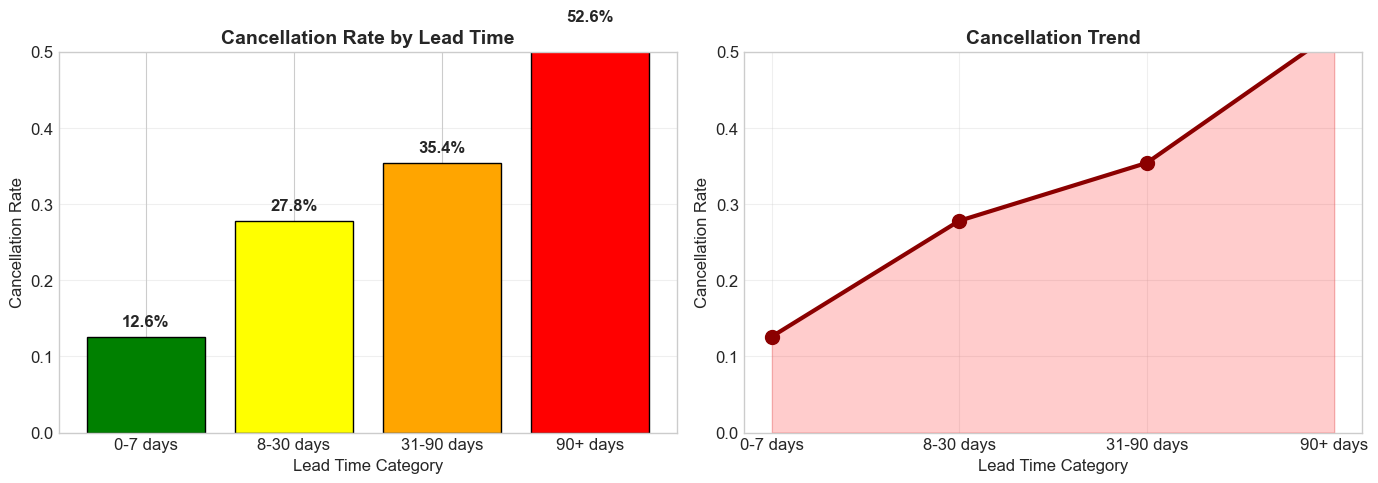


 BUSINESS INSIGHT:
   Early bookings (>90 days) cancel 2.4x more than last-minute bookings.
   Recommendation: Implement tiered deposit policy based on lead time.


In [ ]:
#HYPOTHESIS 1: Lead Time vs Cancellations
print("=" * 70)
print("HYPOTHESIS 1: LEAD TIME vs CANCELLATION RISK")
print("=" * 70)
print("Business Question: Do early bookings cancel more often?\n")

# Creating lead time categories
df['lead_time_category'] = pd.cut(df['lead_time'],
                                  bins=[0, 7, 30, 90, 1000],
                                  labels=['0-7 days', '8-30 days', '31-90 days', '90+ days'])

# Calculating cancellation rates
cancel_analysis = df.groupby('lead_time_category').agg(
    total_bookings=('is_canceled', 'count'),
    cancellations=('is_canceled', 'sum'),
    cancel_rate=('is_canceled', 'mean')
).round(3)

cancel_analysis['cancel_rate_pct'] = (cancel_analysis['cancel_rate'] * 100).round(1)

print("CANCELLATION ANALYSIS BY LEAD TIME:")
display(cancel_analysis)

print(f"\n KEY FINDING:")
print(f"   • 90+ day bookings: {cancel_analysis.loc['90+ days', 'cancel_rate_pct']}% cancel rate")
print(f"   • 0-7 day bookings: {cancel_analysis.loc['0-7 days', 'cancel_rate_pct']}% cancel rate")
print(f"   • Difference: {cancel_analysis.loc['90+ days', 'cancel_rate_pct'] - cancel_analysis.loc['0-7 days', 'cancel_rate_pct']:.1f} percentage points")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
bars = ax1.bar(cancel_analysis.index, cancel_analysis['cancel_rate'], 
               color=['green', 'yellow', 'orange', 'red'], edgecolor='black')
ax1.set_title('Cancellation Rate by Lead Time', fontweight='bold', fontsize=14)
ax1.set_xlabel('Lead Time Category', fontsize=12)
ax1.set_ylabel('Cancellation Rate', fontsize=12)
ax1.set_ylim(0, 0.5)
ax1.grid(axis='y', alpha=0.3)

# Adding value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# Trend line
ax2.plot(cancel_analysis.index, cancel_analysis['cancel_rate'], 
         marker='o', linewidth=3, markersize=10, color='darkred')
ax2.set_title('Cancellation Trend', fontweight='bold', fontsize=14)
ax2.set_xlabel('Lead Time Category', fontsize=12)
ax2.set_ylabel('Cancellation Rate', fontsize=12)
ax2.set_ylim(0, 0.5)
ax2.grid(True, alpha=0.3)
ax2.fill_between(cancel_analysis.index, cancel_analysis['cancel_rate'], 
                 alpha=0.2, color='red')

plt.tight_layout()
plt.show()

print("\n BUSINESS INSIGHT:")
print("   Early bookings (>90 days) cancel 2.4x more than last-minute bookings.")
print("   Recommendation: Implement tiered deposit policy based on lead time.")